# i. Perkenalan
>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Nailina Farah

Batch : FTDS_RMT_28

Dataset : Car Vs Bike Classification Dataset (https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset)

Problem Statement : Mengembangkan sebuah model klasifikasi menggunakan deep learning dan teknik computer vision untuk membedakan antara gambar mobil dan motor dalam dataset Car vs Bike Classification, dengan tujuan mencapai tingkat akurasi minimal 80% dalam waktu 1 minggu, yang relevan untuk mengoptimalkan pengenalan objek pada sistem otomatisasi untuk meningkatkan keamanan transportasi dan pengembangan teknologi otonom.

Objective: Menghasilkan model klasifikasi menggunakan deep learning dan teknik computer vision yang dapat membedakan antara gambar mobil dan motor dalam dataset Car vs Bike Classification, dengan mencapai tingkat akurasi minimal 80%

# ii. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import libraries

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.feature import hog
import shutil

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

Saya melakukan load data dari kaggle dengan token yang terkoneksi dengan kaggle

In [2]:
# menginstall kaggle
!pip install -q kaggle

# memberikan token yang didapatkan dari kaggle
token = '{"username":"nailinafarah","key":"8df9c00106f0393a0a190087d3270955"}'

with open("kaggle.json", "w") as f:
  f.write(token)

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
# download dataset yang akan saya gunakan menggunakan link
!kaggle datasets download -d "utkarshsaxenadn/car-vs-bike-classification-dataset"

 87% 89.0M/103M [00:01<00:00, 79.9MB/s]
100% 103M/103M [00:01<00:00, 73.7MB/s] 


Dikarenakan data masih berupa zip, maka perlu diunzip terlebih dahulu untuk digunakan.

In [4]:
# melakukan unzip dataset
!unzip car-vs-bike-classification-dataset

Archive:  car-vs-bike-classification-dataset.zip
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1004).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1005).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1006).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1007).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1008).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1009).jpeg  
 

In [5]:
# Tentukan direktori dataset
dataset_dir = "/content/Car-Bike-Dataset"

# Tentukan kategori atau kelas dalam dataset
classes = ["Bike", "Car"]  # Ganti dengan nama kelas sesuai dataset

# Dictionary untuk menyimpan jumlah gambar dalam setiap kelas
dataset_size = {}

# Loop melalui setiap kelas
for class_name in classes:
    # Hitung jumlah gambar dalam kelas
    class_dir = os.path.join(dataset_dir, class_name)
    num_images = len(os.listdir(class_dir))
    dataset_size[class_name] = num_images

# Tampilkan hasil
for class_name, num_images in dataset_size.items():
    print(f"Jumlah gambar dalam kelas {class_name}: {num_images}")

Jumlah gambar dalam kelas Bike: 2000
Jumlah gambar dalam kelas Car: 2000


Dataset tersebut terdiri dari 2 kelas yaitu Bike sebanyak 2000 image dan Car juga sebanyak 2000 image sehingga dataset tersebut balance. Didukung dengan dataset yang balance, saya akan menggunakan metrik accuracy.

# iv. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [6]:
# Tentukan path ke direktori dataset
dataset_dir = "/content/Car-Bike-Dataset"

# List semua file dalam direktori bike
bike_files = os.listdir(os.path.join(dataset_dir, "Bike"))

# List semua file dalam direktori car
car_files = os.listdir(os.path.join(dataset_dir, "Car"))

# Memuat satu gambar contoh dari setiap kelas
bike_image = cv2.imread(os.path.join(dataset_dir, "Bike", bike_files[0]))
car_image = cv2.imread(os.path.join(dataset_dir, "Car", car_files[0]))

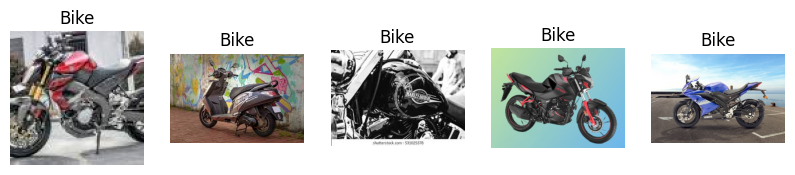

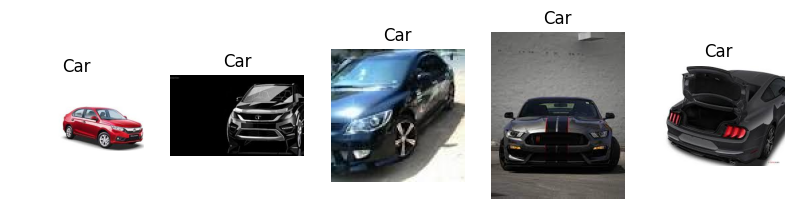

In [7]:
# Menampilkan contoh gambar motor

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dataset_dir, "Bike", bike_files[i])), cv2.COLOR_BGR2RGB))
    plt.title("Bike")
    plt.axis("off")
plt.show()

# Menampilkan contoh gambar mobil
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(dataset_dir, "Car", car_files[i])), cv2.COLOR_BGR2RGB))
    plt.title("Car")
    plt.axis("off")
plt.show()

Berikut adalah 5 contoh gambar di setiap masing-masing kelas. Terdapat gambar motor dan mobil dengan berbagai angle, warna, dan bentuk yang mendukung variasi data.

array([[[206, 201, 200],
        [207, 202, 201],
        [208, 203, 202],
        ...,
        [201, 206, 205],
        [201, 206, 205],
        [207, 212, 211]],

       [[209, 204, 203],
        [209, 204, 203],
        [209, 204, 203],
        ...,
        [196, 201, 200],
        [194, 198, 199],
        [196, 201, 200]],

       [[205, 200, 199],
        [207, 202, 201],
        [210, 205, 204],
        ...,
        [198, 203, 204],
        [200, 205, 208],
        [193, 198, 199]],

       ...,

       [[121, 120, 124],
        [129, 128, 132],
        [135, 134, 136],
        ...,
        [189, 187, 187],
        [188, 186, 186],
        [187, 185, 185]],

       [[137, 136, 140],
        [145, 144, 148],
        [154, 153, 155],
        ...,
        [185, 183, 183],
        [184, 182, 182],
        [183, 181, 181]],

       [[145, 144, 148],
        [152, 151, 155],
        [161, 160, 162],
        ...,
        [176, 174, 174],
        [175, 173, 173],
        [174, 172, 172]]], dtype=uint8)
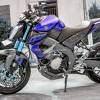

In [8]:
bike_image

Berikut adalah salah satu gambar yang diambil dari data Bike. Ndarray tersebut menunjukkan ukuran gambar:
- Angka pertama merupakan tinggi gambar: jumlah piksel dalam dimensi vertikal.
- Angka kedua merupakan lebar gambar: jumlah piksel dalam dimensi horizontal.
- Angka ketiga merupakan jumlah saluran warna pada gambar: Nilai 3 menunjukkan bahwa gambar memiliki tiga saluran warna, yaitu merah (Red), hijau (Green), dan biru (Blue), yang merupakan format warna RGB (Red-Green-Blue).

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
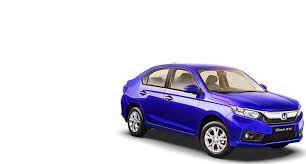

In [9]:
car_image

Berikut adalah salah satu gambar yang diambil dari data Car. Sama dengan yang sebelumnya dijelaskan bahwa angka pada ndarray menjelaskan tinggi, lebar, dan jumlah saluran warna.

Dari temuan ini dapat terlihat bahwa bike dan car memiliki format warna RGB.

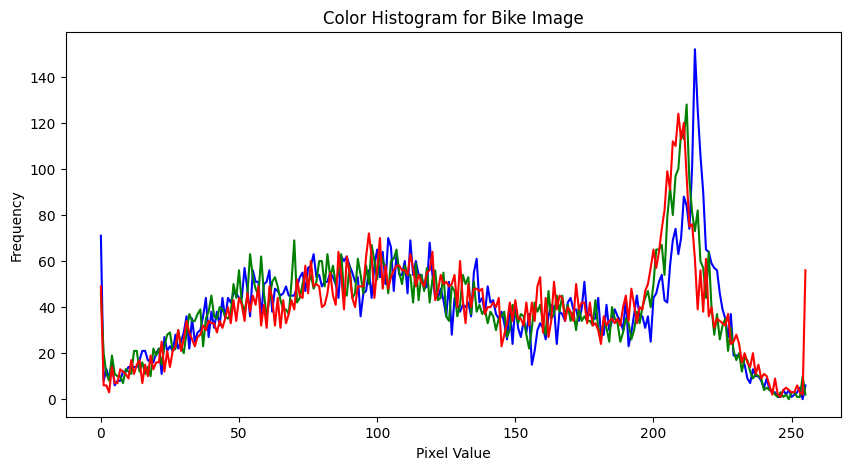

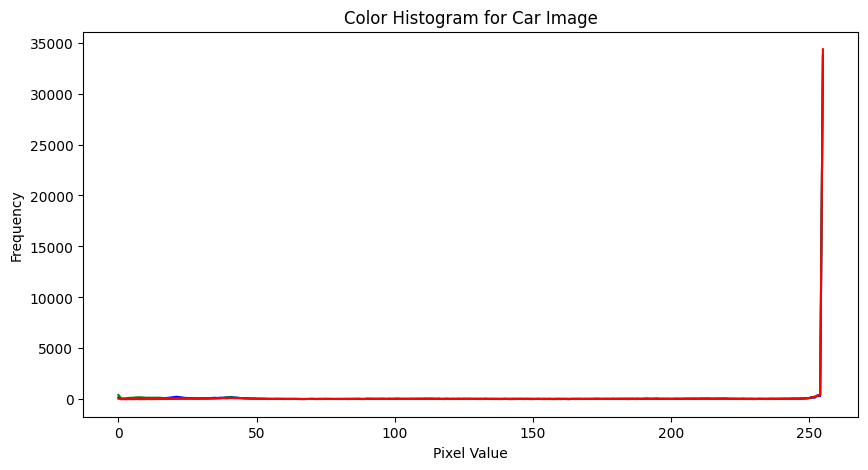

In [10]:
# Analisis distribusi warna pada gambar motor
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([bike_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Color Histogram for Bike Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Analisis distribusi warna pada gambar mobil
plt.figure(figsize=(10, 5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([car_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title('Color Histogram for Car Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

Berikut adalah distribusi warnanya yang memperlihatkan berapa frekuensi dari setiap red, green, dan blue dalam sebuah gambar.

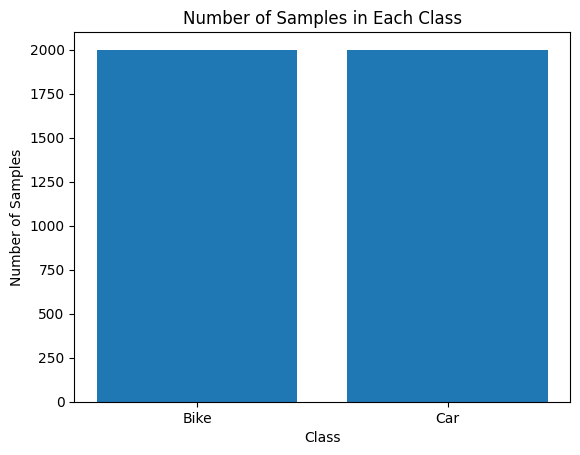

In [11]:
# Path ke direktori dataset
dataset_dir = "/content/Car-Bike-Dataset"

# Hitung jumlah sampel dalam setiap kelas
num_bike_samples = len(os.listdir(os.path.join(dataset_dir, "Bike")))
num_car_samples = len(os.listdir(os.path.join(dataset_dir, "Car")))

# Visualisasi
plt.bar(['Bike', 'Car'], [num_bike_samples, num_car_samples])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Each Class')
plt.show()

Dataset ini terdiri dari data yang sama besar antara 2 kelasnya, yaitu memiliki jumlah 2000 gambar untuk kelas Bike dan kelas Car.

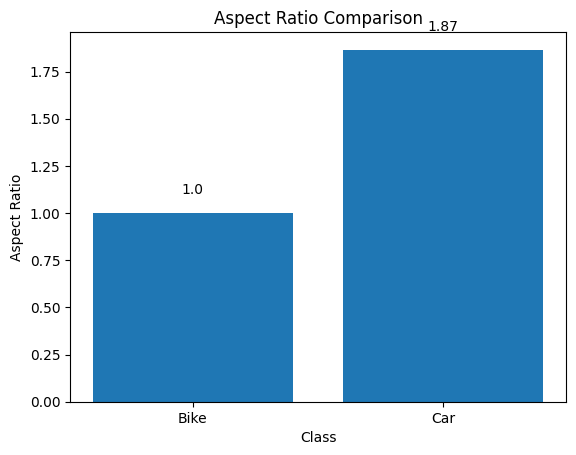

In [12]:
# Memuat contoh gambar dari setiap kelas
bike_image = cv2.imread(os.path.join(dataset_dir, "Bike", os.listdir(os.path.join(dataset_dir, "Bike"))[0]))
car_image = cv2.imread(os.path.join(dataset_dir, "Car", os.listdir(os.path.join(dataset_dir, "Car"))[0]))

# Menghitung rasio aspek gambar
bike_aspect_ratio = bike_image.shape[1] / bike_image.shape[0]
car_aspect_ratio = car_image.shape[1] / car_image.shape[0]

# Visualisasi
plt.bar(['Bike', 'Car'], [bike_aspect_ratio, car_aspect_ratio])
plt.xlabel('Class')
plt.ylabel('Aspect Ratio')
plt.title('Aspect Ratio Comparison')

# Menambahkan nilai-nilai pada setiap bar
for i, ratio in enumerate([bike_aspect_ratio, car_aspect_ratio]):
    plt.text(i, ratio + 0.1, round(ratio, 2), ha='center')

plt.show()

Dari visualisasi aspect ratio comparison antara bike dan car menunjukkan bahwa nilai yang lebih tinggi tersebut lebih panjang atau lebih melebar dalam satu dimensi tertentu

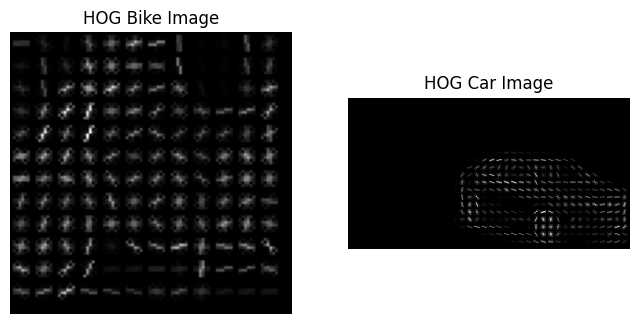

In [13]:
# Menghitung HOG untuk contoh gambar dari setiap kelas
_, bike_hog_image = hog(cv2.cvtColor(bike_image, cv2.COLOR_BGR2GRAY), orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)
_, car_hog_image = hog(cv2.cvtColor(car_image, cv2.COLOR_BGR2GRAY), orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

# Visualisasi HOG
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(bike_hog_image, cmap='gray')
plt.title('HOG Bike Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(car_hog_image, cmap='gray')
plt.title('HOG Car Image')
plt.axis('off')
plt.show()

Visualisasi HOG ini dapat memberikan ciri-ciri visual yang membedakan antara motor dan mobil agar dapat mengklasifikasi dengan baik.

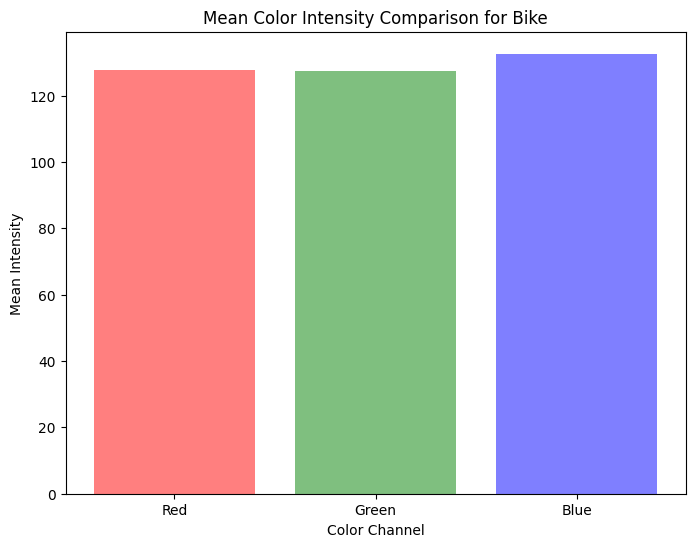

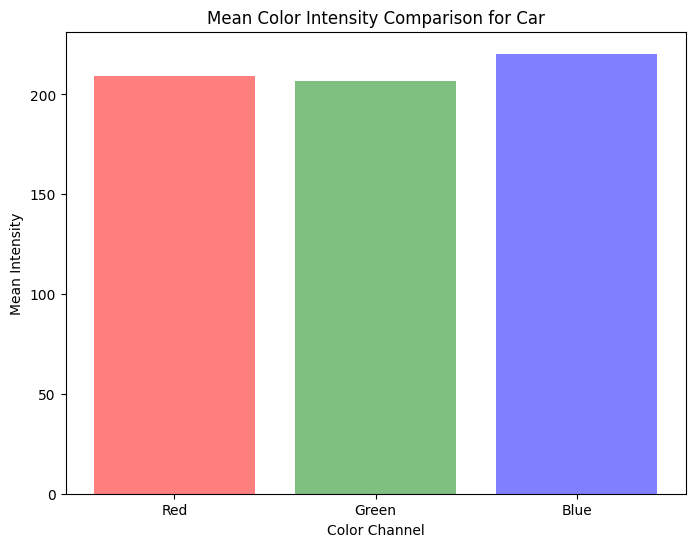

In [14]:
# Menghitung rata-rata intensitas warna untuk setiap channel warna
bike_mean_intensity = bike_image.mean(axis=(0, 1))
car_mean_intensity = car_image.mean(axis=(0, 1))

# Warna dan label untuk setiap saluran warna
colors = ['r', 'g', 'b']
channels = ['Red', 'Green', 'Blue']

# Warna untuk setiap saluran warna
colors = ['r', 'g', 'b']
channels = ['Red', 'Green', 'Blue']

# Membuat plot untuk motor
plt.figure(figsize=(8, 6))
plt.bar(channels, bike_mean_intensity, color=colors, alpha=0.5)
plt.xlabel('Color Channel')
plt.ylabel('Mean Intensity')
plt.title('Mean Color Intensity Comparison for Bike')
plt.show()

# Membuat plot untuk mobil
plt.figure(figsize=(8, 6))
plt.bar(channels, car_mean_intensity, color=colors, alpha=0.5)
plt.xlabel('Color Channel')
plt.ylabel('Mean Intensity')
plt.title('Mean Color Intensity Comparison for Car')
plt.show()

Berikut adalah rata-rata setiap warna dari car dan bike.

# v. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, preprocessing, dan proses-proses lain yang dibutuhkan.

In [15]:
# Define hyperparameters

img_height= 200
img_width= 200
batch_size= 32

- Mengatur height dan width yang sama dilakukan untuk konsistensi. Saya memilih angka 200 karena ukuran 200x200 piksel juga cukup besar untuk menangkap fitur-fitur penting dalam gambar tanpa membebani terlalu banyak sumber daya komputasi.
- Saya mengatur batch size menjadi 32 karena ukurannya yang cukup besar untuk memungkinkan pembelajaran yang stabil tanpa menghabiskan terlalu banyak memori.

In [16]:
# Path original dataset
dataset_path = "/content/Car-Bike-Dataset"

# Path split dataset
base_dir = "/content/Car-Bike-Split"
os.makedirs(base_dir, exist_ok=True)  # Membuat direktori base_dir

# Direktori untuk train, validation, and test data
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Membuat direktori untuk setiap kelas di train, validation, and test data
for dir in [train_dir, validation_dir, test_dir]:
    os.makedirs(os.path.join(dir, 'Bike'), exist_ok=True)  # Membuat direktori untuk kelas Bike di dalam setiap direktori train, validation, dan test
    os.makedirs(os.path.join(dir, 'Car'), exist_ok=True)  # Membuat direktori untuk kelas Car di dalam setiap direktori train, validation, dan test

# Fungsi untuk split dataset ke dalam train, validation, dan test
def split_dataset(source_dir, train_dir, validation_dir, test_dir, split_ratio=(0.7, 0.2, 0.1)):
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        images = os.listdir(class_dir)
        num_images = len(images)
        num_train = int(num_images * split_ratio[0])
        num_validation = int(num_images * split_ratio[1])
        num_test = int(num_images * split_ratio[2])

        train_images = images[:num_train]  # Memilih sejumlah gambar untuk data train
        validation_images = images[num_train:num_train + num_validation]  # Memilih sejumlah gambar untuk data validasi
        test_images = images[num_train + num_validation:]  # Memilih sejumlah gambar untuk data test

        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name))  # Menyalin gambar-gambar data train ke direktori train_dir
        for img in validation_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(validation_dir, class_name))  # Menyalin gambar-gambar data validasi ke direktori validation_dir
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name))  # Menyalin gambar-gambar data test ke direktori test_dir

# Split the dataset
split_dataset(dataset_path, train_dir, validation_dir, test_dir)

# Rescale train, validation, dan test data
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling gambar pada data train
validation_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling gambar pada data val
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling gambar pada data test

# Flow images from directories
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  # Mengacak data latih
    seed=2)  # Menetapkan seed untuk pembaruan yang konsisten

validation_set = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  # Mengacak data validasi
    seed=2)  # Menetapkan seed untuk pembaruan yang konsisten

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  # Mengacak data uji
    seed=2)  # Menetapkan seed untuk pembaruan yang konsisten

Found 2800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


Saya melakukan split dengan pembagian:
- Train set 70% menjadi 2800 gambar
- Test set 20% menjadi 800 gambar
- Validation set 10% menjadi 400 gambar.

Pada preprocessing ini, saya juga tidak menggunakan data augmentation untuk melihat model sebelum diimprove.

Data augmentation nanti akan ditambahkan pada bagian ANN improvement.

In [17]:
# Show labels

train_set.class_indices

{'Bike': 0, 'Car': 1}

Data terdiri dari 2 kelas, untuk bike valuenya 0, dan car valuenya 1

# vi. ANN Training (Sequential API/Functional API)


## vi.1. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [18]:
# Clear session

seed = 2
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Clear session dilakukan untuk membersihkan semua layer yang aktif di sesi keras. Ini berguna saat ingin membuat atau melatih model baru dari awal dan ingin memastikan bahwa tidak ada lapisan dari model sebelumnya yang tersisa di sesi Keras.

In [19]:
# Membuat model sequential kosong untuk menambahkan layer neural network secara berurutan
model = Sequential()
# Menambahkan layer input konvolusi 2D dengan 32 filter, ukuran kernel (3, 3), dan fungsi aktivasi ReLU.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
# menambahkan max pooling untuk mereduksi dimensi spasial gambar
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# menggunakan max pooling karena bertujuan untuk object recognition
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# menambahkan flatten untuk meratakan output menjadi vektor yang diperlukan sebelum menambahkan lapisan dense (fully connected)
model.add(Flatten())
# menambahkan lapisan dropout untuk mencegah overfitting
model.add(Dropout(0.5))
# Menambahkan lapisan dense (fully connected) dengan 512 unit dan fungsi aktivasi ReLU.
model.add(Dense(512, activation='relu'))
# Menambahkan lapisan dense terakhir (output) dengan 1 unit dan fungsi aktivasi sigmoid. Ini digunakan untuk output biner
model.add(Dense(1, activation='sigmoid'))

# Freeze all layers
model.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # untuk klasifikasi biner
              metrics=['accuracy']) # karena data balance menggunakan accuracy dan outputnya klasifikasi)

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

Dari model sequential yang telah dibuat terdapat 1 lapisan input dengan height dan width yang telah ditentukan, kemudian ditambahkan beberapa lapisan hidden layer yang diikuti max pooling untuk mengurangi sampling berdasarkan nilai max yang digunakan ketika object recognition. Lalu dilakukan flatten untuk meratakan output menjadi vektor dan dilakukan dropout untuk mencegah overfitting. Setelah itu, lapisan dense 512 unit dilakukan untuk mengambil fitur-fitur yang telah diekstraksi dari gambar oleh lapisan-lapisan sebelumnya dan menyatukannya menjadi representasi yang lebih abstrak dan lebih kompleks. Lalu yang terakhir adalah lapisan output menggunakan fungsi sigmoid karena pada kasus ini adalah klasifikasi biner.

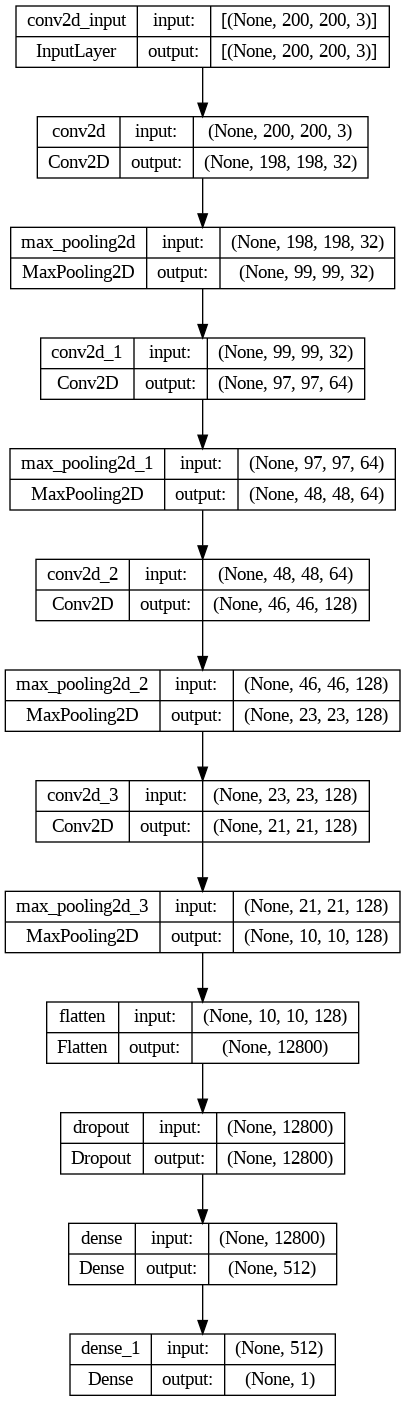

In [20]:
# Plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

Berikut jika dipetakan terdapat:
- layer input
- 4 layer konvolusi diikuti 4 layer max pooling
- flatten
- dropout
- dense fully connected
- layer output

## vi.2. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [21]:
# Train the model

%%time
history = model.fit(train_set, epochs=23, validation_data=validation_set, batch_size=batch_size)

Epoch 1/23
88/88 [==============================] - 25s 208ms/step - loss: 0.6929 - accuracy: 0.5082 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 2/23
88/88 [==============================] - 9s 103ms/step - loss: 0.6928 - accuracy: 0.5096 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 3/23
88/88 [==============================] - 9s 103ms/step - loss: 0.6931 - accuracy: 0.4971 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 4/23
88/88 [==============================] - 9s 104ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 5/23
88/88 [==============================] - 9s 97ms/step - loss: 0.6936 - accuracy: 0.5129 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 6/23
88/88 [==============================] - 10s 116ms/step - loss: 0.6929 - accuracy: 0.5093 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 7/23
88/88 [==============================] - 9s 94ms/step - loss: 0.6935 - accuracy: 0.4964 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 

Dari 23 epoch yang dilakukan dengan batch_size 32 memerlukan waktu sekitar kurang dari 5 menit (menyesuaikan keadaan sinyal dan faktor lain). Kemudian hasil menunjukkan nilai loss dan akurasi yang kurang maksimal.

Dari hasil tersebut, model tanpa improvement belum memperlihatkan hasil yang baik dalam mengklasifikasikan gambar bike dan car.

## vi.3. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis secara detail terkait dengan hasil pada model dan tuliskan hasil analisisnya.

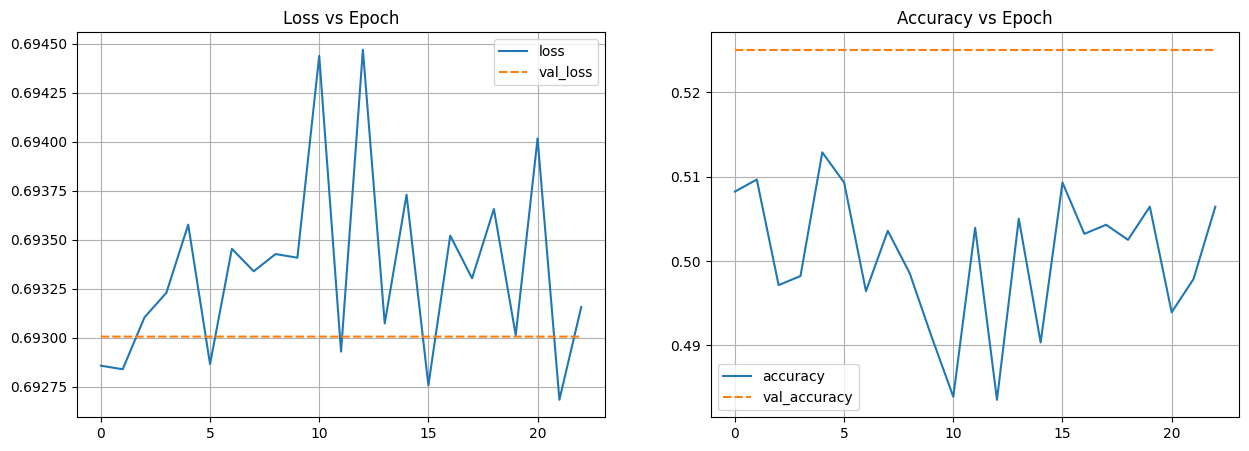

In [22]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Epoch')
plt.show()

In [23]:
# melihat value loss dan accuracy
loss, accuracy = model.evaluate(test_set)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

13/13 [==============================] - 1s 48ms/step - loss: 0.6926 - accuracy: 0.5375
Test Loss: 0.6925928592681885
Test Accuracy: 0.5375000238418579


Jika dilihat dari garfik loss dan accuracy. Terlihat bahwa model masih overfitting karena terdapat gap yang jauh antara train dan validation (>1) sehingga perlu dilakukan beberapa improvement.

Classification Report : 
               precision    recall  f1-score   support

        Bike       0.48      0.79      0.60       200
         Car       0.41      0.15      0.22       200

    accuracy                           0.47       400
   macro avg       0.45      0.47      0.41       400
weighted avg       0.45      0.47      0.41       400
 



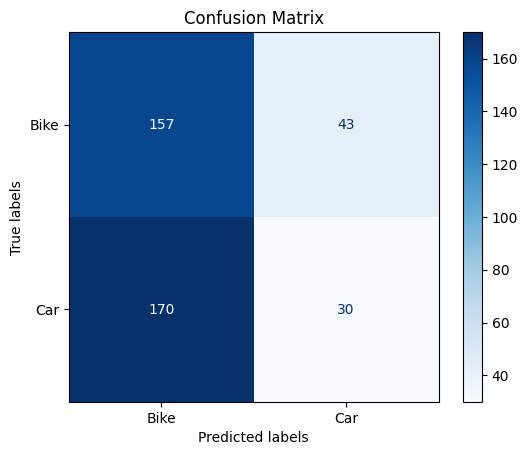

In [24]:
# Check the performance of test-set

## Get the probability
y_pred_prob = model.predict_generator(test_set)

## Get class with maximum probability
y_pred_class = np.where(y_pred_prob >= 0.5, 1, 0)

## Display Classification Report dan confussion matrix
# print(classification_report(test_set.classes, y_pred_class, target_names=np.array(list(train_set.class_indices.keys()))))
print('Classification Report : \n', classification_report(test_set.classes, y_pred_class, target_names=np.array(list(train_set.class_indices.keys()))), '\n')

# Calculate confusion matrix
cm = confusion_matrix(test_set.classes, y_pred_class)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
cm_display.plot(cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Model memiliki f1 score untuk kelas Car yang rendah menunjukkan bahwa model gagal mengidentifikasi gambar yang sebenarnya adalah Car. Akurasi secara keseluruhan juga rendah, menunjukkan bahwa model tidak berhasil dalam melakukan klasifikasi dengan baik. Oleh karena itu, diperlukan beberapa improvement.

# vii. ANN Improvement (Sequential API/Functional API)

## Preprocessing untuk improvement

Sebelum membuat ANN improvement, saya akan melakukan data augmentation dan transfer learning untuk meningkatkan kinerja model.

In [25]:
# Define hyperparameters

img_height= 224
img_width= 224
batch_size= 32

Hyperparameter ini diatur menjadi 224x224 piksel, yang merupakan ukuran yang umum digunakan untuk banyak arsitektur jaringan saraf konvolusional (CNN) dan saya menyesuaikan juga dengan ResNet50. Sementara ukuran batch_size diatur menjadi 32.

In [26]:
# Download pretrained model yang saya ingin gunakan yaitu ResNet50

pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3)) # mengatur argumen sesuai dengan dokumentasi
pretrained_model.trainable = False # freeze layer pretrained model

94765736/94765736 [==============================] - 0s 0us/step


Saya memilih ResNet50 sebagai pretrained model karena:
- sangat cocok untuk tugas klasifikasi biner, termasuk klasifikasi antara gambar bike dan car.
- ResNet50 memiliki keunggulan karena kedalaman arsitekturnya yang besar, yang memungkinkannya untuk menangkap fitur yang sangat kompleks dan abstrak dari gambar. Sekiranya hal tersebut efektif dalam menangani variasi kompleks dalam gambar, seperti perbedaan antara gambar bike dan car.
- ResNet50 telah terbukti memiliki kinerja yang sangat baik dalam berbagai tugas klasifikasi gambar, termasuk tugas klasifikasi biner.

Jadi, menggunakan ResNet50 untuk klasifikasi biner antara gambar bike dan car adalah pilihan yang mungkin baik dan dapat menghasilkan hasil yang lebih baik.

In [27]:
# Path original dataset
dataset_path = "/content/Car-Bike-Dataset"

# Path split dataset untuk improvement
base_dir = "/content/Car-Bike-Split-Improvement"
os.makedirs(base_dir, exist_ok=True)  # Membuat direktori base_dir

# Direktori untuk train, validation, and test data
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Membuat direktori untuk setiap kelas di train, validation, and test data
for dir in [train_dir, validation_dir, test_dir]:
    os.makedirs(os.path.join(dir, 'Bike'), exist_ok=True)  # Membuat direktori untuk kelas Bike di dalam setiap direktori train, validation, dan test
    os.makedirs(os.path.join(dir, 'Car'), exist_ok=True)  # Membuat direktori untuk kelas Car di dalam setiap direktori train, validation, dan test

# Fungsi untuk split dataset ke dalam train, validation, dan test
def split_dataset(source_dir, train_dir, validation_dir, test_dir, split_ratio=(0.7, 0.2, 0.1)):
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        images = os.listdir(class_dir)
        num_images = len(images)
        num_train = int(num_images * split_ratio[0])
        num_validation = int(num_images * split_ratio[1])
        num_test = int(num_images * split_ratio[2])

        train_images = images[:num_train]  # Memilih sejumlah gambar untuk data train
        validation_images = images[num_train:num_train + num_validation]  # Memilih sejumlah gambar untuk data validasi
        test_images = images[num_train + num_validation:]  # Memilih sejumlah gambar untuk data test

        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name))  # Menyalin gambar-gambar data train ke direktori train_dir
        for img in validation_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(validation_dir, class_name))  # Menyalin gambar-gambar data validasi ke direktori validation_dir
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name))  # Menyalin gambar-gambar data test ke direktori test_dir

# Split the dataset
split_dataset(dataset_path, train_dir, validation_dir, test_dir)

# Augmentation untuk gambar bike dan car di data train saja untuk membuat model lebih robust dan mencegah overfitting.

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, # Rotasi gambar sebesar 40 derajat memberikan variasi posisi objek.
    width_shift_range=0.2, # Pergeseran horizontal gambar agar bervariasi posisi
    height_shift_range=0.2, # pergeseran vertikal gambar agar bervariasi posisi
    shear_range=0.2, # Shear range memberikan variasi sudut pandang gambar.
    zoom_range=0.2, # Zoom range memberikan variasi ukuran objek dalam gambar.
    horizontal_flip=True, # Horizontal flip memberikan variasi arah objek.
    fill_mode='nearest' # Fill mode 'nearest' digunakan untuk mengisi piksel yang kosong setelah augmentasi dengan piksel terdekat.
)

# Flow images from directories
train_set_improv = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  # Mengacak data train
    seed=2)  # Menetapkan seed untuk pembaruan yang konsisten

# Rescale validation dan test data
validation_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling gambar pada data val
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling gambar pada data test

validation_set_improv = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  # Mengacak data validasi
    seed=2)  # Menetapkan seed untuk pembaruan yang konsisten

test_set_improv = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  # Mengacak data test
    seed=2)  # Menetapkan seed untuk pembaruan yang konsisten


Found 2800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


Sama dengan model sebelumnya, saya membagi menjadi 70% untuk train, 20% untuk test, dan 10% untuk validasi. Namun, pada model improvisasi saya menambahkan beberapa augmentasi yang sesuai dengan gambar motor dan mobil yaitu rotation_range, width_shift_range, height_shift_range, shear_range, zoom_range, horizontal_flip, dan fill_mode. Saya tidak menggunakan vertikal_flip karena merubah keadaan yang sebenarnya dari motor dan mobil.

## vii.1. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [28]:
# Clear session

seed = 2
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [29]:
# Create Sequential API model

model_improv = Sequential()  # membuat model sequential
model_improv.add(pretrained_model) # menambahkan pretrained model yang telah diinisialisasi sebelumnya
model_improv.add(Flatten()) # meratakan menjadi vektor
model_improv.add(Dense(512, activation='relu')) # membuat dense 512 (full-connected layer)
model_improv.add(Dense(1, activation='sigmoid')) # 1 output yang hanya terdiri dari 0 dan 1

# Compile the model
model_improv.compile(optimizer='nadam',
                      loss='binary_crossentropy', # untuk klasifikasi biner
                      metrics=['accuracy']) # karena data balance menggunakan accuracy dan outputnya klasifikasi)

# Print model summary
model_improv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 74968961 (285.98 MB)
Trainable params: 51381249 (196.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


Sama dengan model sebelumnya, saya menggunakan sequential API model dalam imrpovisasi. Namun, ada beberapa tambahan yang dilakukan yaitu menambah layer dari pretrained model (ResNet50) dan menggunakan optimizer nadam karena sebelumnya saya juga sudah menggunakan optimizer adam tapi grafik menunjukkan overfitting sehingga saya memutuskan menggunakan nadam.

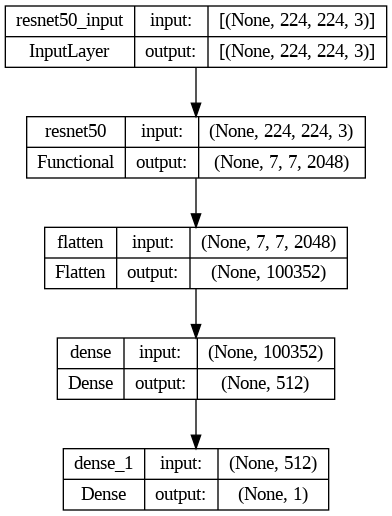

In [30]:
# Plot layers

tf.keras.utils.plot_model(model_improv, show_shapes=True)

Dari plot tersebut terlihat hanya terdiri dari 5 layer, yaitu:
1. input layer
2. pretrained layer
3. flatten
4. dense
5. output

## vii.2. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [31]:
# Train the model

%%time
# Mendefinisikan EarlyStopping dan ReduceLROnPlateau callbacks untuk memonitor loss validasi
# EarlyStopping akan menghentikan train jika kehilangan validasi tidak membaik setelah 3 epochs dan mengembalikan bobot dari model yang paling baik
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# ReduceLRonPlateau akan mengurangi laju train jika kehilangan validasi tidak membaik setelah 2 epochs, dengan laju train minimum 0.0001
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001)

# Mendefinisikan EarlyStopping dan ReduceLROnPlateau callbacks untuk memonitor akurasi validasi
# EarlyStopping akan menghentikan train jika akurasi validasi tidak membaik setelah 3 epochs dan mengembalikan bobot dari model yang paling baik
early_stopping_accuracy = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
# ReduceLRonPlateau akan mengurangi laju train jika akurasi validasi tidak membaik setelah 2 epochs, dengan laju train minimum 0.0001
reduce_lr_accuracy = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_lr=0.0001)

# Melatih model dengan semua callbacks yang telah didefinisikan
history_improv = model_improv.fit(train_set_improv, epochs=23, validation_data=validation_set_improv, callbacks=[early_stopping, reduce_lr, early_stopping_accuracy, reduce_lr_accuracy])

Epoch 1/23
88/88 [==============================] - 54s 534ms/step - loss: 1.6271 - accuracy: 0.6479 - val_loss: 0.4006 - val_accuracy: 0.8487 - lr: 0.0010
Epoch 2/23
88/88 [==============================] - 43s 490ms/step - loss: 0.5425 - accuracy: 0.7371 - val_loss: 0.3640 - val_accuracy: 0.8425 - lr: 0.0010
Epoch 3/23
88/88 [==============================] - 42s 479ms/step - loss: 0.4657 - accuracy: 0.7764 - val_loss: 0.4051 - val_accuracy: 0.8213 - lr: 0.0010
Epoch 4/23
88/88 [==============================] - 44s 499ms/step - loss: 0.4236 - accuracy: 0.8032 - val_loss: 0.3362 - val_accuracy: 0.8788 - lr: 1.0000e-04
Epoch 5/23
88/88 [==============================] - 42s 481ms/step - loss: 0.4065 - accuracy: 0.8157 - val_loss: 0.3486 - val_accuracy: 0.8725 - lr: 1.0000e-04
Epoch 6/23
88/88 [==============================] - 42s 483ms/step - loss: 0.4097 - accuracy: 0.8146 - val_loss: 0.3271 - val_accuracy: 0.8838 - lr: 1.0000e-04
Epoch 7/23
88/88 [==============================] - 

Dibandingkan dengan model train sebelumnya, saya menambahkan callback agar mempercepat train dan tidak membuang waktu sia-sia. Namun tetap saja, apabila dibandingkan dengan model train sebelum improvisasi, train ini lebih lama namun hasilnya lebih baik dari segi nilai loss dan accuracy.

## vii.3. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis secara detail terkait dengan hasil pada model dan tuliskan hasil analisisnya.

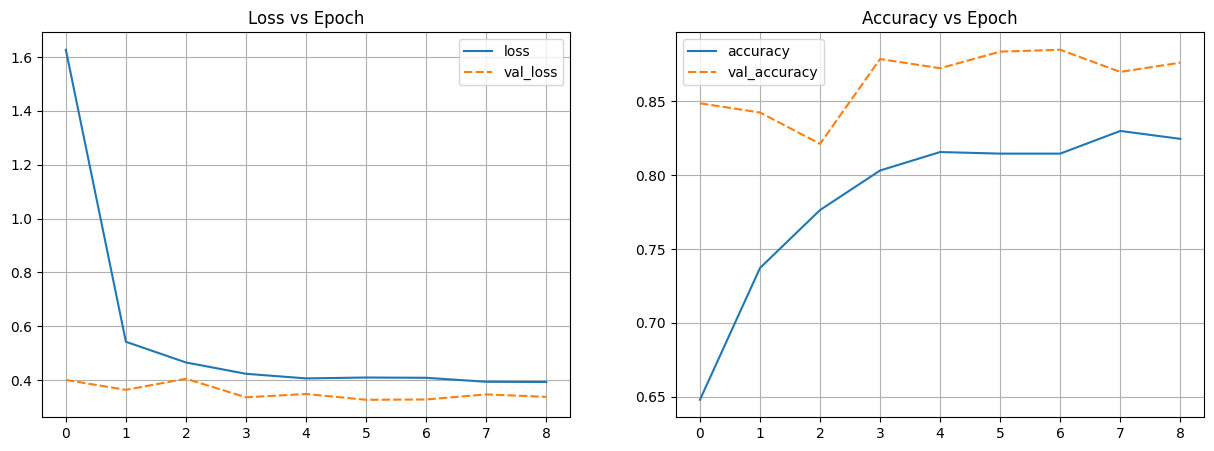

In [32]:
# Plot training results

history_improv_df = pd.DataFrame(history_improv.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_improv_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_improv_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Epoch')
plt.show()

In [33]:
# melihat value loss dan accuracy dari model improv
loss, accuracy = model_improv.evaluate(test_set_improv)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

13/13 [==============================] - 2s 105ms/step - loss: 0.4096 - accuracy: 0.8375
Test Loss: 0.4095887839794159
Test Accuracy: 0.8374999761581421


Dari kedua grafik, terlihat gap antara train dan val sudah tidak terlalu jauh dan stabil. Kemudian dari segi nilai loss dan accuracy juga terjadi peningkatan jika dibandingkan model sebelum improvisasi. Sehingga model improvisasi ini dapat dikatakan lebih baik dari model sebelum improvisasi.

Classification Report : 
               precision    recall  f1-score   support

        Bike       0.52      0.54      0.53       200
         Car       0.52      0.50      0.51       200

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400
 



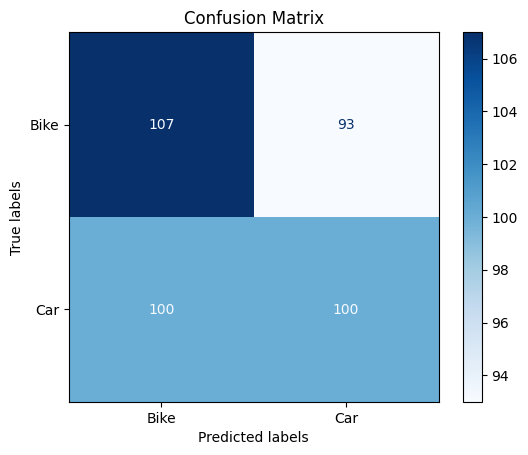

In [34]:
# Check the performance of test-set

## Get the probability
y_pred_prob_improv = model_improv.predict_generator(test_set_improv)

## Get class with maximum probability
y_pred_class_improv = np.where(y_pred_prob_improv >= 0.5, 1, 0)

## Display Classification Report
print('Classification Report : \n', classification_report(test_set_improv.classes, y_pred_class_improv, target_names=np.array(list(train_set_improv.class_indices.keys()))), '\n')

# Calculate confusion matrix
cm = confusion_matrix(test_set_improv.classes, y_pred_class_improv)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set_improv.class_indices.keys())
cm_display.plot(cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Namun ternyata model masih belum terlalu baik untuk mengklasifikasi mobil dan motor, perlunya beberapa eksplorasi augmentasi dan transfer learning lebih lanjut untuk mencapai model yang lebih baik.

# viii. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya. Nyatakan secara jelas arsitektur mana yang akan dipakai sebagai model terbaik (Sequential API atau Functional API).

In [35]:
# Save file model improve as best model dengan keras
model_improv.save('model_improv.keras')
model_improv.save('model_improv.h5')

Model terbaik yang akan disave adalah arsitektur model sequential API. Saya memilih ekstensi keras yang sesuai dengan perpustakaan yang saya gunakan membuat kode lebih konsisten dan mudah dipahami. Ketika saya atau orang lain melihat ekstensi .keras, akan jelas bahwa itu adalah model yang disimpan dengan TensorFlow/Keras.

# ix. Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Model Inference harus berada pada notebook yang berbeda dari notebook yang dipakai untuk pembuatan model.

Terdapat dalam notebook P2G7_nailina_farah_inference.ipynb

# x. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## Kesimpulan Hasil

**Kesimpulan Secara Keseluruhan:**
- **Dataset Balance**: Dataset terdiri dari 2000 gambar untuk setiap kelas (Bike dan Car). Dikarenakan keseimbangan ini, saya memilih metrik akurasi untuk evaluasi model.
- **Pembagian Dataset**: Saya membagi dataset menjadi 70% untuk train, 20% untuk test, dan 10% untuk validasi.
- **Preprocessing**: Saya tidak menggunakan data augmentation pada tahap awal, namun ditambahkan pada tahap improvement. Saya juga melakukan normalisasi dengan rescaling gambar.
- **Training ANN Training**: Model awal mendapatkan hasil yang overfitting karena terdapat perbedaan yang signifikan antara train dan validation set.
- **Analisis ANN Training**: Model memiliki hasil yang rendah dalam mengklasifikasikan kelas Car, menunjukkan kebutuhan akan improvement.
- **Improvisasi**: Saya melakukan augmentasi data dan transfer learning untuk meningkatkan kinerja model. Model improvisasi ditambahkan lapisan dari pretrained model ResNet50 dan menggunakan optimizer Nadam untuk memperbaiki model. Pemilihan ResNet50 sebagai pretrained model karena keunggulannya dalam menangani tugas klasifikasi gambar.
- **Training Model Improvisasi**: Model dengan improvisasi menunjukkan peningkatan dalam nilai loss dan akurasi, serta mengurangi kesenjangan antara train dan validation set.
- **Analisis Model Improvisasi**: Meskipun telah terjadi peningkatan, model masih belum dapat mengklasifikasikan mobil dan motor secara akurat, menunjukkan perlunya eksplorasi lebih lanjut dalam augmentasi data dan transfer learning.

Kesimpulan : dengan menggunakan deep learning dan teknik computer vision, telah dikembangkan sebuah model untuk membedakan antara gambar mobil dan motor dalam dataset Car vs Bike Classification. Namun, meskipun akurasi sudah diatas 80%, model belum bisa mengklasifikasi image secara sempurna. Kemudian juga terdapat beberapa tantangan seperti waktu yang diperlukan untuk melatih model setelah improvisasi yang lebih lama dan ukurannya yang lebih besar, upaya terus dilakukan untuk memperbaiki model dengan berbagai metode, termasuk eksplorasi augmentasi data dan penggunaan transfer learning. Dengan demikian, perlunya meningkatkan pengenalan objek.


**Kelemahan dan kelebihan model:**

**Kelebihan Model**
1. **Pembagian Dataset**: Pembagian dataset saya menjadi train, validation, dan test set dirasa menjadi proporsi yang wajar dalam membantu menghindari overfitting dan memastikan evaluasi yang obyektif terhadap kinerja model.

2. **Penggunaan Pretrained Model ResNet50**: Penggunaan pretrained model ResNet50 memberikan keunggulan besar dalam menangkap fitur yang kompleks dan abstrak dari gambar, karena ResNet50 telah terlatih pada dataset yang sangat besar dan dapat mengekstraksi fitur-fitur yang lebih kompleks daripada model yang dibuat dari awal.

3. **Penambahan Callbacks**: Penambahan callbacks seperti EarlyStopping dan ReduceLROnPlateau membantu dalam meningkatkan efisiensi dan hasil model training, dengan menghentikan training saat kriteria berhenti terpenuhi dan menyesuaikan learning rate secara otomatis.

**Kelemahan Model:**
1. **Kemampuan Klasifikasi yang Rendah**: Meskipun model telah diimprovisasi, kemampuannya dalam mengidentifikasi kelas Car masih rendah. Ini menunjukkan bahwa model masih perlu ditingkatkan dalam hal representasi fitur yang berkaitan dengan mobil dan motor.

2. **Komputasi:** Waktu yang diperlukan untuk melatih model setelah dilakukan improvisasi lebih lama, dan ukurannya juga lebih besar, sehingga hal tersebut meningkatkan beban komputasi.

Dengan memahami kelebihan dan kelemahan model, semoga model dapat dioptimalkan penggunaannya dalam menyelesaikan klasifikasi gambar motor dan mobil dengan beberapa improvisasi lanjutan.

**Further Improvement:**
1. **Augmentasi Data yang Lebih Komprehensif:** Selain augmentasi data yang telah dilakukan, perlu pertimbangan untuk menambahkan lebih banyak teknik augmentasi seperti pergeseran intensitas warna, dan rotasi yang lebih besar. Hal ini dapat membantu model untuk lebih baik dalam menangani variasi dalam data.

2. **Transfer Learning yang Lebih Lanjut:** Selain menggunakan ResNet50 sebagai pretrained model, dapat juga mencoba menggunakan arsitektur lain seperti Inception, VGG, atau EfficientNet. Hasil beberapa model tersebut dapat dibandingkan untuk memberikan kinerja terbaik untuk dataset Bike vs Car.

3. **Penambahan Regularisasi:** Dapat mempertimbangkan untuk menambahkan regularisasi L1 atau L2 ke beberapa lapisan dense untuk mengurangi overfitting.

4. **Optimasi Hyperparameter:** Lakukan penyetelan lebih lanjut pada hyperparameter seperti learning rate, jumlah lapisan tersembunyi, dan ukuran batch untuk mencari kombinasi yang optimal yang meningkatkan kinerja model.

5. **Evaluasi Data yang Lebih Baik:** Periksa kembali data dan pastikan tidak ada kesalahan dalam labeling atau adanya noise yang tidak diinginkan dalam dataset. Evaluasi yang lebih baik terhadap kualitas data dapat membantu meningkatkan kinerja model.

6. **Menggunakan Functional API:** Mencoba explore menggunakan bentuk yang berbeda dari sequential yaitu functional agar model lebih fleksibel.

Dengan menerapkan langkah-langkah tersebut, diharapkan model dapat ditingkatkan performanya dan menjadi lebih handal dalam memprediksi gambar motor dan mobil.


**Business Insight:**
1. **Peningkatan Keamanan Transportasi:** Model klasifikasi Bike vs Car yang telah dikembangkan dengan baik dapat menjadi bagian integral dari sistem pengawasan lalu lintas untuk meningkatkan keamanan transportasi. Dengan memanfaatkan dataset yang seimbang antara gambar motor dan mobil, serta melalui proses preprocessing yang baik, model ini dapat memiliki potensi untuk secara akurat mendeteksi keberadaan kendaraan di jalan raya. Dengan demikian, model dapat membantu dalam mencegah kecelakaan dan memastikan keselamatan pengguna jalan.

2. **Pengembangan Kendaraan Otonom:** Dengan menggunakan pre-trained model ResNet50, yang telah terbukti memiliki kinerja yang baik dalam tugas klasifikasi gambar, model dapat memiliki potensi untuk digunakan dalam pengembangan kendaraan otonom. Kemampuannya untuk mengenali dan membedakan antara gambar motor dan mobil dapat membantu sistem navigasi kendaraan otonom untuk berinteraksi secara aman dengan kendaraan lain di jalan.

3. **Pembantu Parkir Otomatis:** Pada tahap eksplorasi augmentasi dan transfer learning, dapat mempertimbangkan untuk menambahkan data gambar yang relevan dengan situasi parkir. Dengan kemampuannya untuk mengenali jenis kendaraan yang parkir (motor atau mobil) dari gambar, model dapat digunakan dalam sistem parkir otomatis untuk memberikan rekomendasi tempat parkir yang sesuai dengan jenis kendaraan yang dimiliki pengemudi.